# Midterm
### Rolando Santos
### https://github.com/rsantos2032/DSCI401/
### 2023-10-19

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import calendar
warnings.filterwarnings('ignore')

In [3]:
employee = pd.read_csv('https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Employee.csv')
stops = pd.read_csv('https://raw.githubusercontent.com/gjm112/DSCI401/main/data/CTA_List_of_L_Stops.csv')
entries = pd.read_csv('https://raw.githubusercontent.com/gjm112/DSCI401/main/data/CTA_entries.csv')

### Question 1: Answer the following questions using the Employee data set.

In [268]:
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


#### a. For each education level, what percentage of the employees are female?

In [269]:
employee_female = employee.groupby('Education').Gender.agg(lambda x: (x == 'Female').mean()).reset_index()
employee_female

,Education,Gender
0,Bachelors,0.398500
1,Masters,0.424971
2,PHD,0.385475


#### b. On a single plot, make three line plots, one for each City, with the variable JoiningYear on the x-axis and cumulative number of hires up to that year on the y-axis (Note: Each row is considered a hire).

Single plot with 3 lines

[Text(0.5, 0, 'Joining Year'), Text(0, 0.5, '# of Hires')]

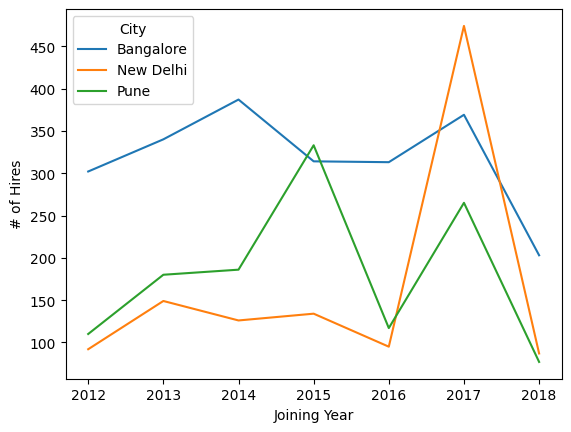

In [270]:
employee_joining = employee.groupby(['JoiningYear', 'City']).agg('size').reset_index()
employee_joining = employee_joining.rename(columns={0: 'Hires'})
g = sns.lineplot(x = 'JoiningYear', y = 'Hires', hue = 'City', data = employee_joining)
g.set(xlabel ='Joining Year', ylabel = '# of Hires')

Single Plot with multiple plots per city.

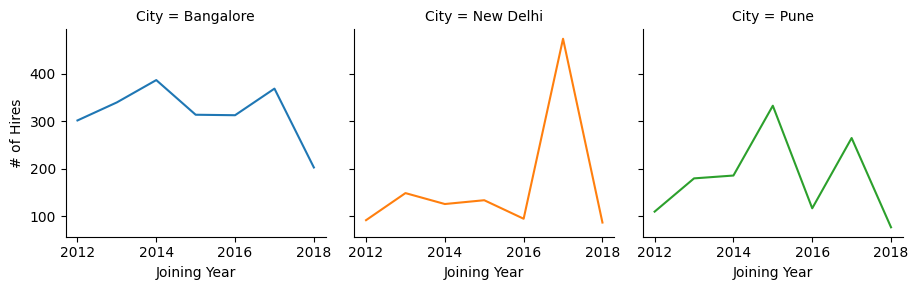

In [271]:
g = sns.FacetGrid(data = employee_joining, col='City', hue='City', col_wrap=5)
g.map(sns.lineplot, 'JoiningYear', 'Hires')
g.set(xlabel ='Joining Year', ylabel = '# of Hires')

#### c. Create side-by-side boxplots of Age vs Gender faceted by City on the rows and Education on the columns.

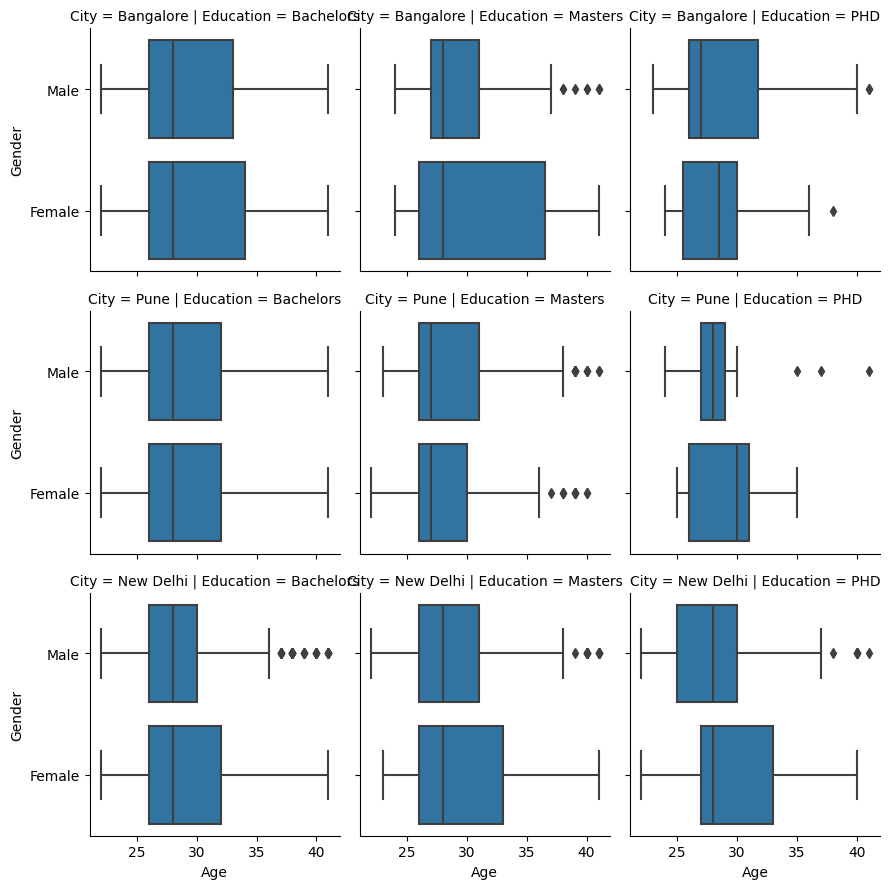

In [272]:
g = sns.FacetGrid(data = employee, col = 'Education', row = 'City')
g.map(sns.boxplot, 'Age', 'Gender');

#### d. For each JoiningYear, compute the ratio of the number of Bachelor’s degrees hired to Ph.D’s hired. Which year has the highest ratio and what is that ratio? For each City, compute the ratio of the number of Bachelor’s degrees hired to Ph.D’s hired. Which city has the highest ratio and what is that ratio? You have now found a year and a city. How many master’s level people were hired in the year and city that you just found?

In [273]:
employee_ratio = employee.groupby('JoiningYear').Education.agg(lambda x: np.sum(x == 'Bachelors')/np.sum(x == 'PHD')).reset_index().sort_values('Education', ascending = False)
employee_ratio

,JoiningYear,Education
0,2012,31.500000
5,2017,31.428571
2,2014,30.250000
4,2016,20.954545
3,2015,19.393939
1,2013,13.275000
6,2018,9.068966


From our data we see that 2012 had the highest ratio (31.5:1) of Bachelors/PHD new hires.

In [274]:
employee_ratio = employee.groupby('City').Education.agg(lambda x: np.sum(x == 'Bachelors')/np.sum(x == 'PHD')).reset_index().sort_values('Education', ascending = False)
employee_ratio

,City,Education
2,Pune,42.166667
0,Bangalore,39.461538
1,New Delhi,5.213592


From our data we see that the city with the highest ratio (42.166667:1) of Bachelors/PHD new hires was Pune.

In [275]:
employee_educ = employee.loc[(employee.City == 'Pune') & (employee.JoiningYear == 2012)].groupby('Education').agg('size').reset_index()
employee_educ = employee_educ.rename(columns={0: 'Hires'})
employee_educ

,Education,Hires
0,Bachelors,94
1,Masters,13
2,PHD,3


From our data, we see that there were 13 Masters students hired in 2012 in the city of Pune.

### Question 2: Answer the following questions using the entries and stops data sets related to the Chicago Transit Authority (CTA).

In [276]:
entries.head()

,station_id,stationname,date,daytype,rides
0,41280,Jefferson Park,12/22/2017,W,6104
1,41000,Cermak-Chinatown,12/18/2017,W,3636
2,40280,Central-Lake,12/02/2017,A,1270
3,40140,Dempster-Skokie,12/19/2017,W,1759
4,40690,Dempster,12/03/2017,U,499


In [277]:
stops.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30082,E,Cicero (Loop-bound),Cicero,Cicero (Pink Line),40420,True,False,False,False,False,False,False,False,True,False,"(41.85182, -87.745336)"
1,30151,E,Central Park (Loop-bound),Central Park,Central Park (Pink Line),40780,True,False,False,False,False,False,False,False,True,False,"(41.853839, -87.714842)"
2,30184,W,Halsted/63rd (Ashland-bound),Halsted,Halsted (Green Line),40940,True,False,False,True,False,False,False,False,False,False,"(41.778943, -87.644244)"
3,30044,N,Cumberland (O'Hare-bound),Cumberland,Cumberland (Blue Line),40230,True,False,True,False,False,False,False,False,False,False,"(41.984246, -87.838028)"
4,30092,E,Racine (O'Hare-bound),Racine,Racine (Blue Line),40470,False,False,True,False,False,False,False,False,False,False,"(41.87592, -87.659458)"


#### a. Using the stops data set, create a data set that only includes stops on the red line and removes duplicated MAP IDs. Merge the stops onto the entries data set. (Note: station id in entries links to MAP ID in stops!)

In [281]:
stops_red_line = stops.loc[stops.RED == True]
stops_red_line = stops_red_line.drop_duplicates(subset='MAP_ID').reset_index(drop=True)
stops_red_line.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30252,S,Loyola (95th-bound),Loyola,Loyola (Red Line),41300,True,True,False,False,False,False,False,False,False,False,"(42.001073, -87.661061)"
1,30237,N,47th (Howard-bound),47th,47th (Red Line),41230,True,True,False,False,False,False,False,False,False,False,"(41.810318, -87.63094)"
2,30267,N,Bryn Mawr (Howard-bound),Bryn Mawr,Bryn Mawr (Red Line),41380,False,True,False,False,False,False,False,False,False,False,"(41.983504, -87.65884)"
3,30173,N,Howard (Terminal arrival),Howard,"Howard (Red, Purple & Yellow lines)",40900,True,True,False,False,False,False,False,False,False,False,"(42.019063, -87.672892)"
4,30088,N,95th/Dan Ryan (Howard-bound),95th/Dan Ryan,95th/Dan Ryan (Red Line),40450,True,True,False,False,False,False,False,False,False,False,"(41.722377, -87.624342)"


In [282]:
stops_red_line.shape

(33, 17)

In [283]:
entries_red_line = pd.merge(entries, stops_red_line, left_on = 'station_id', right_on = 'MAP_ID', how = 'inner')
entries_red_line.head()

,station_id,stationname,date,daytype,rides,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,...,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,41000,Cermak-Chinatown,12/18/2017,W,3636,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,True,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)"
1,41000,Cermak-Chinatown,12/04/2017,W,3842,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,True,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)"
2,41000,Cermak-Chinatown,12/21/2017,W,3701,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,True,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)"
3,41000,Cermak-Chinatown,12/22/2017,W,3688,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,True,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)"
4,41000,Cermak-Chinatown,12/30/2017,A,2518,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,True,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)"


In [284]:
entries_red_line.shape

(270988, 22)

#### b. Using this merged data set, compute the average number of rides per day for each station on the red line. Next compute the 1 average number of rides per day for each station for each month (i.e. average rides per day at Loyola at January, average rides per day at Loyola in February, etc.).

In [285]:
avg_rides_per_day = entries_red_line.groupby('stationname').rides.agg('mean').reset_index()
avg_rides_per_day

,stationname,rides
0,47th-Dan Ryan,2373.420198
1,63rd-Dan Ryan,2607.493403
2,69th,4471.159624
3,79th,5799.328896
4,87th,3671.289830
5,95th/Dan Ryan,9380.474911
6,Addison-North Main,6740.117168
7,Argyle,2359.832887
8,Belmont-North Main,9525.730161
9,Berwyn,2572.610929


In [286]:
def convert_to_month(x):
    month_num = int(x[:2])
    return calendar.month_name[month_num]
    
convert_to_month('12/10/2008')

'December'

In [287]:
vconvert_to_month = np.vectorize(convert_to_month)
entries_red_line['month'] = entries_red_line.loc[:, 'date'].apply(vconvert_to_month)
entries_red_line.head()

,station_id,stationname,date,daytype,rides,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,...,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,month
0,41000,Cermak-Chinatown,12/18/2017,W,3636,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)",December
1,41000,Cermak-Chinatown,12/04/2017,W,3842,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)",December
2,41000,Cermak-Chinatown,12/21/2017,W,3701,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)",December
3,41000,Cermak-Chinatown,12/22/2017,W,3688,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)",December
4,41000,Cermak-Chinatown,12/30/2017,A,2518,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)",December


In [288]:
entries_red_line.shape

(270988, 23)

In [291]:
avg_rides_per_month = entries_red_line.groupby(['stationname', 'month']).rides.agg('mean').reset_index()
avg_rides_per_month

,stationname,month,rides
0,47th-Dan Ryan,April,2340.462319
1,47th-Dan Ryan,August,2317.114035
2,47th-Dan Ryan,December,2271.527859
3,47th-Dan Ryan,February,2348.779661
4,47th-Dan Ryan,January,2197.267882
...,...,...,...
391,Wilson,March,4783.363254
392,Wilson,May,4422.270687
393,Wilson,November,4903.548485
394,Wilson,October,5321.887097


#### c.  Using this two variables found in the previous part, for each station create a variable called ratio which is the ratio of rides per day per month divided by rides per day. (This is essentially a measure of how far away ridership in a given month gets away from the overall average at a stop with values larger than 1 indicating a sharp increase and values less than 1 a sharp decrease). Display the top ten largest ratios and comment on and reason you believe these particular stops and months are the top of the list.

In [292]:
ratio_rides = pd.merge(avg_rides_per_month, avg_rides_per_day, left_on = 'stationname', right_on = 'stationname', how = 'left')
ratio_rides = ratio_rides.groupby(['stationname', 'month']).apply(lambda g: pd.Series({'ratio': g.rides_x.values[0]/g.rides_y.values[0]})).reset_index().sort_values('ratio', ascending = False)
ratio_rides.head(10)

,stationname,month,ratio
73,Addison-North Main,August,1.350174
77,Addison-North Main,July,1.335230
78,Addison-North Main,June,1.314043
226,Harrison,October,1.297800
178,Fullerton,October,1.265885
371,Sox-35th-Dan Ryan,September,1.260468
83,Addison-North Main,September,1.243627
299,Loyola,September,1.221302
361,Sox-35th-Dan Ryan,August,1.218152
179,Fullerton,September,1.204860


For the Addison-North Main stations and Sox-35th-Dan Ryan stations, they will typically have more traffic since during these months June, July, August, September is the middle/end of baseball season.Loyola station during September also makes sense because it is the beginning of the school year.Fullerton and Harrison are probably Fall events considering its September/October.

#### d.  Compute the standard deviation of this ratio for each station and find the stations with the 5 largest standard deviations. Using these five stations, a line plot (one line for each station) with month on the x-axis and ratio on the y-axis.

In [293]:
highest_sd_stations = ratio_rides.groupby('stationname').ratio.apply(np.std, axis = 0).reset_index().sort_values('ratio', ascending = False)
highest_sd_stations = highest_sd_stations.head(5)
highest_sd_stations

,stationname,ratio
6,Addison-North Main,0.268232
30,Sox-35th-Dan Ryan,0.178863
14,Fullerton,0.151726
18,Harrison,0.139363
24,Loyola,0.113688


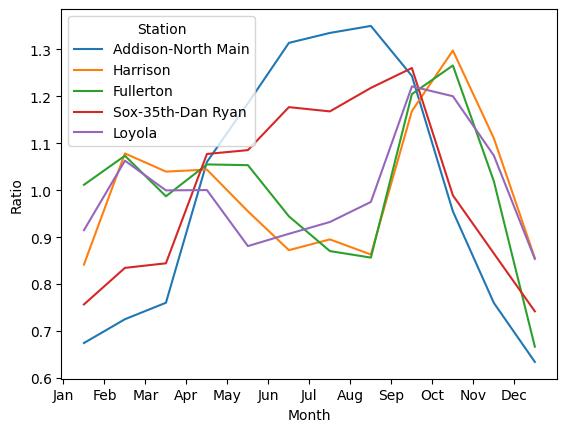

In [294]:
ratio_rides_filtered = ratio_rides.loc[ratio_rides.stationname.isin(highest_sd_stations['stationname'].tolist())]
lower_ma = [m.lower() for m in calendar.month_name]
ratio_rides_filtered['month'] = ratio_rides_filtered['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('int')

g = sns.lineplot(x = 'month', y = 'ratio', hue = 'stationname', data = ratio_rides_filtered)
g.set(xlabel ='Month', ylabel = 'Ratio')
g.legend_.set_title('Station')
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
plt.show()